# Ансамблевые методы

- Ансамблевые методы помогают свести к минимуму ошибки при обучении за счет уменьшения шума, смещения и дисперсии.
- Они повышают стабильность и точность алгоритмов машинного обучения.
- Объединение нескольких классификаторов уменьшает дисперсию, особенно для нестабильных классификаторов.
- Бэггинг и бустинг используют набор базовых алгоритмов обучения, таких как деревья классификации.


# Простые методы

1. Maximum Voting:
- Обычно используется для задач классификации.
- Каждая модель делает прогнозы для отдельных точек данных.
- Прогнозы рассматриваются как "голоса".
- Окончательный прогноз - это результат с большинством голосов.
2. Усреднение:
- Для каждой точки данных делается несколько прогнозов.
- Вычисляется среднее значение всех прогнозов.
- Это среднее значение используется в качестве окончательного прогноза.
3. Средневзвешенное значение:
- Расширение метода усреднения.
- Веса присваиваются каждой модели на основе ее прогноза.
- Средневзвешенное значение прогнозов используется в качестве окончательного прогноза.


# Продвинутые методы

1. Бэггинг (bootstrap aggregating)
Это метод, используемый для повышения точности моделей машинного обучения. Он используется для задач классификации и регрессии. Уменьшает дисперсию путем усреднения прогнозов нескольких базовых обучаемых, которые обычно представляют собой деревья решений. Бэггинг эффективно сокращает переобучение и повышает стабильность моделей.
Бэггинг состоит из двух этапов:
1.1. Bootstraping: Создаются несколько обучающих наборов путем случайной выборка с заменой из исходного набора данных.
1.2. Aggregation: Объединяются прогнозы базовых элементов, как правило, путем их усреднения.

2. Бустинг
Повышает точность моделей машинного обучения, объединяя слабых учащихся в сильного учащегося. Он работает путем упорядочивания слабых учащихся в последовательности, где каждый учащийся учится на ошибках предыдущего учащегося.
Бустинг принимает различные формы, включая:
- Бустинг градиента добавляет предикторы последовательно, где каждый предиктор исправляет ошибки предыдущего предиктора, используя градиентный спуск для выявления ошибок и противодействия им.
- AdaBoost использует деревья решений с одним разделением, известные как пни решений, и фокусируется на наблюдениях с аналогичными весами.
- XGBoost использует деревья решений с увеличенным градиентом для повышения скорости и производительности, в значительной степени полагаясь на скорость вычислений и производительность целевой модели.

Обучение модели на машинах с градиентным ускорением осуществляется в определенной последовательности, что замедляет реализацию
по сравнению с другими методами.


3. Стэкинг
Целью стекинга является повышение точности прогнозирования путем объединения нескольких сильных учеников в единую надежную модель. Он отличается от бэггинга и бустинга тем, что объединяет сильных обучаемых. Процесс включает в себя обучение отдельных гетерогенных моделей на исходном наборе данных. Эти модели делают прогнозы, формируя новый набор данных на основе этих прогнозов. Этот новый набор данных используется для обучения метамодели, которая делает окончательный прогноз. Прогноз объединяется с использованием взвешенного усреднения. Способность объединять сильных учеников позволяет использовать модели с бэггингом или бустингом.



---

Перед использованием различных вариантов ансамблей попробуем подогнать гиперпараметры для предыдущего проекта так, чтобы наша точность прогноза возросла.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.metrics import classification_report

df = pd.read_csv('Datasets/Loan/train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
df = df.rename(columns=str.lower)
df.shape

(614, 13)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    object 
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
en = LabelEncoder()
cat = ['gender', 'married', 'education', 'self_employed', 'property_area', 'loan_status']
for cols in cat:
    df[cols] = en.fit_transform(df[cols])

In [5]:
df['dependents'].replace('3+', 3, inplace=True)
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [6]:
df.isna().sum()

loan_id               0
gender                0
married               0
dependents           15
education             0
self_employed         0
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

In [7]:
from sklearn.impute import KNNImputer

df_clean = df
df_clean.drop('loan_id', axis=1, inplace=True)

imputer = KNNImputer(n_neighbors=3)
df_clean = pd.DataFrame(imputer.fit_transform(df), columns=df_clean.columns)
df_clean.isnull().sum()

gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

In [8]:
X = df_clean.drop(columns=['loan_status']).values
y = df_clean['loan_status'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [9]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
rfc = RandomForestClassifier(criterion='entropy', random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [11]:
from sklearn import metrics

y_pred = rfc.predict(X_test)

metrix = metrics.accuracy_score(y_test, y_pred)
print('Accuracy', metrix)

Accuracy 0.8051948051948052


In [13]:
from pprint import pprint
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
print("Лучшие параметры:")
pprint(rf_classifier.get_params())

Лучшие параметры:
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


# Сделаем GridSearch

In [18]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy', verbose=10)
grid_search.fit(X_train, y_train)
print("Grid Search выполнен.")

Fitting 3 folds for each of 1152 candidates, totalling 3456 fits
[CV 1/3; 1/1152] START bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 1/3; 1/1152] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.799 total time=   0.0s
[CV 2/3; 1/1152] START bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/3; 1/1152] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.758 total time=   0.0s
[CV 3/3; 1/1152] START bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 3/3; 1/1152] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimat

ОН СЧИТАЕТСЯ ОЧЕНЬ ДОЛГО (ПРЕДУПРЕДИЛ, ЗНАЧИТ ВООРУЖИЛ ЗНАНИЕМ)

In [19]:
# Обучим модель с уже идеальными параметрами, посмотрим прогноз и сравним его с предыдущим
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8246753246753247


# Перейдем к ансамблевым методам

In [20]:
import pandas as pd

df = pd.read_csv("Datasets/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
df.shape

(768, 9)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [23]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [24]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [25]:
categorical_val = []
continous_val = []
for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [26]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [28]:
feature_columns = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'
]

for column in feature_columns:
    print(f"Столбец, {column} ==> Пропущенных нулей: {len(df.loc[df[column] == 0])}")

Столбец, Pregnancies ==> Пропущенных нулей: 111
Столбец, Glucose ==> Пропущенных нулей: 5
Столбец, BloodPressure ==> Пропущенных нулей: 35
Столбец, SkinThickness ==> Пропущенных нулей: 227
Столбец, Insulin ==> Пропущенных нулей: 374
Столбец, BMI ==> Пропущенных нулей: 11
Столбец, DiabetesPedigreeFunction ==> Пропущенных нулей: 0
Столбец, Age ==> Пропущенных нулей: 0


In [30]:
from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(missing_values=0, strategy="mean", copy=False)
df[feature_columns] = fill_values.fit_transform(df[feature_columns])

for column in feature_columns:
    print(f"Столбец, {column} ==> Пропущенных нулей: {len(df.loc[df[column] == 0])}")

Столбец, Pregnancies ==> Пропущенных нулей: 0
Столбец, Glucose ==> Пропущенных нулей: 0
Столбец, BloodPressure ==> Пропущенных нулей: 0
Столбец, SkinThickness ==> Пропущенных нулей: 0
Столбец, Insulin ==> Пропущенных нулей: 0
Столбец, BMI ==> Пропущенных нулей: 0
Столбец, DiabetesPedigreeFunction ==> Пропущенных нулей: 0
Столбец, Age ==> Пропущенных нулей: 0


In [31]:
from sklearn.model_selection import train_test_split

X = df[feature_columns]
y = df.Outcome
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("РЕЗУЛЬТАТЫ НА ТРЕЙНЕ: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("РЕЗУЛЬТАТЫ НА ТЕСТЕ: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

# Бэггинг

In [33]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

rf_clf = RandomForestClassifier(random_state=42, n_estimators=1000)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

РЕЗУЛЬТАТЫ НА ТРЕЙНЕ: 
CONFUSION MATRIX:
[[349   0]
 [  0 188]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    349.0  188.0       1.0      537.0         537.0
РЕЗУЛЬТАТЫ НА ТЕСТЕ: 
CONFUSION MATRIX:
[[123  28]
 [ 29  51]]
ACCURACY SCORE:
0.7532
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.809211   0.645570  0.753247    0.727390      0.752538
recall       0.814570   0.637500  0.753247    0.726035      0.753247
f1-score     0.811881   0.641509  0.753247    0.726695      0.752878
support    151.000000  80.000000  0.753247  231.000000    231.000000


In [37]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

base_classifier = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)

bagging_clf.fit(X_train, y_train)

scores = {}

scores['Bagging Classifier'] = {
    'Train': accuracy_score(y_train, bagging_clf.predict(X_train)),
    'Test': accuracy_score(y_test, bagging_clf.predict(X_test)),
}

# Calculate and store accuracy scores for Random Forest
scores['Random Forest'] = {
    'Train': accuracy_score(y_train, rf_clf.predict(X_train)),
    'Test': accuracy_score(y_test, rf_clf.predict(X_test)),
}

# Бустинг

In [38]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=30)
ada_boost_clf.fit(X_train, y_train)
evaluate(ada_boost_clf, X_train, X_test, y_train, y_test)

РЕЗУЛЬТАТЫ НА ТРЕЙНЕ: 
CONFUSION MATRIX:
[[310  39]
 [ 51 137]]
ACCURACY SCORE:
0.8324
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.858726    0.778409  0.832402    0.818567      0.830607
recall       0.888252    0.728723  0.832402    0.808488      0.832402
f1-score     0.873239    0.752747  0.832402    0.812993      0.831056
support    349.000000  188.000000  0.832402  537.000000    537.000000
РЕЗУЛЬТАТЫ НА ТЕСТЕ: 
CONFUSION MATRIX:
[[123  28]
 [ 27  53]]
ACCURACY SCORE:
0.7619
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.820000   0.654321  0.761905    0.737160      0.762622
recall       0.814570   0.662500  0.761905    0.738535      0.761905
f1-score     0.817276   0.658385  0.761905    0.737830      0.762249
support    151.000000  80.000000  0.761905  231.000000    231.000000


C:\Users\Admin\PycharmProjects\100DaysOfDataScience\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [39]:
scores['AdaBoost'] = {
    'Train': accuracy_score(y_train, ada_boost_clf.predict(X_train)),
    'Test': accuracy_score(y_test, ada_boost_clf.predict(X_test)),
}

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
grad_boost_clf.fit(X_train, y_train)
evaluate(grad_boost_clf, X_train, X_test, y_train, y_test)

РЕЗУЛЬТАТЫ НА ТРЕЙНЕ: 
CONFUSION MATRIX:
[[342   7]
 [ 19 169]]
ACCURACY SCORE:
0.9516
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.947368    0.960227  0.951583    0.953798      0.951870
recall       0.979943    0.898936  0.951583    0.939439      0.951583
f1-score     0.963380    0.928571  0.951583    0.945976      0.951194
support    349.000000  188.000000  0.951583  537.000000    537.000000
РЕЗУЛЬТАТЫ НА ТЕСТЕ: 
CONFUSION MATRIX:
[[116  35]
 [ 26  54]]
ACCURACY SCORE:
0.7359
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.816901   0.606742  0.735931    0.711821      0.744119
recall       0.768212   0.675000  0.735931    0.721606      0.735931
f1-score     0.791809   0.639053  0.735931    0.715431      0.738906
support    151.000000  80.000000  0.735931  231.000000    231.000000


In [41]:
scores['Gradient Boosting'] = {
    'Train': accuracy_score(y_train, grad_boost_clf.predict(X_train)),
    'Test': accuracy_score(y_test, grad_boost_clf.predict(X_test)),
}

In [42]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression(solver='liblinear')
tree = DecisionTreeClassifier()
svm_clf = SVC(gamma='scale')

estimators = [('Logistic', log_reg), ('Tree', tree), ('SVM', svm_clf)]

voting = VotingClassifier(estimators=estimators)
voting.fit(X_train, y_train)
evaluate(voting, X_train, X_test, y_train, y_test)

РЕЗУЛЬТАТЫ НА ТРЕЙНЕ: 
CONFUSION MATRIX:
[[327  22]
 [ 82 106]]
ACCURACY SCORE:
0.8063
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.799511    0.828125  0.806331    0.813818      0.809529
recall       0.936963    0.563830  0.806331    0.750396      0.806331
f1-score     0.862797    0.670886  0.806331    0.766841      0.795610
support    349.000000  188.000000  0.806331  537.000000    537.000000
РЕЗУЛЬТАТЫ НА ТЕСТЕ: 
CONFUSION MATRIX:
[[130  21]
 [ 37  43]]
ACCURACY SCORE:
0.7489
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.778443   0.671875  0.748918    0.725159      0.741536
recall       0.860927   0.537500  0.748918    0.699214      0.748918
f1-score     0.817610   0.597222  0.748918    0.707416      0.741285
support    151.000000  80.000000  0.748918  231.000000    231.000000


In [43]:
scores['Voting'] = {
    'Train': accuracy_score(y_train, voting.predict(X_train)),
    'Test': accuracy_score(y_test, voting.predict(X_test)),
}

<Axes: >

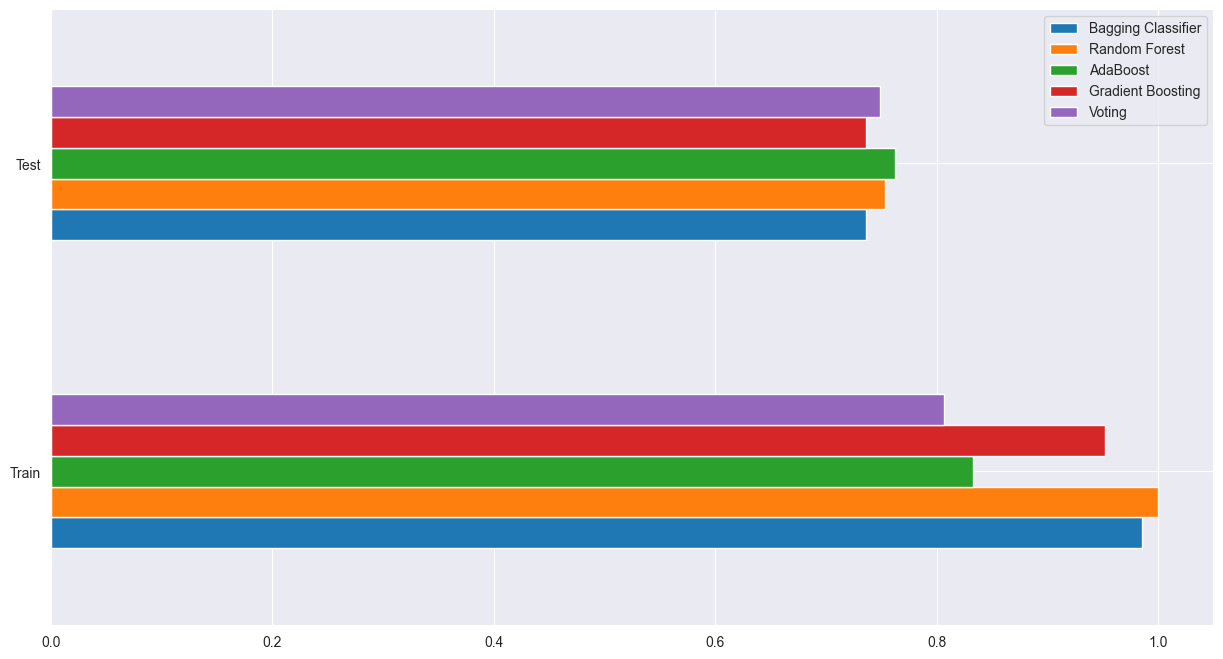

In [44]:
scores_df = pd.DataFrame(scores)
scores_df.plot(kind='barh', figsize=(15, 8))